<h1>EDA and CNN + LSTM</h1>

<h1>EDA</h1>

In [5]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv("Birmingham.csv")

In [4]:
df.shape

(52230, 4)

In [7]:
df.head()

,Date,tmax,tmin,prcp
0,1879-01-01,48.0,37.0,0.61
1,1879-01-02,46.0,21.0,0.02
2,1879-01-03,21.0,11.0,0.00
3,1879-01-04,25.0,9.0,0.00
4,1879-01-05,29.0,19.0,0.00


In [15]:
df.tail()

,Date,tmax,tmin,prcp
52225,2021-12-27,70.0,59.0,0.00
52226,2021-12-28,75.0,62.1,0.00
52227,2021-12-29,73.9,64.9,0.28
52228,2021-12-30,70.0,61.0,2.85
52229,2021-12-31,71.1,57.0,0.01


In [16]:
df['tmax'] = df['tmax'].interpolate()
df['tmin'] = df['tmin'].interpolate()
df['prcp'] = df['prcp'].interpolate()

In [17]:
df.isnull().any()

Date    False
tmax    False
tmin    False
prcp    False
dtype: bool

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52230 entries, 0 to 52229
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    52230 non-null  object 
 1   tmax    52230 non-null  float64
 2   tmin    52230 non-null  float64
 3   prcp    52230 non-null  float64
dtypes: float64(3), object(1)
memory usage: 1.6+ MB


In [13]:
df.shape

(52230, 4)

In [19]:
df.describe()

,tmax,tmin,prcp
count,52230.000000,52230.000000,52230.000000
mean,71.292462,52.680492,0.134627
std,15.521875,15.125850,0.373926
min,7.000000,-9.000000,0.000000
25%,60.000000,40.000000,0.000000
50%,73.000000,55.000000,0.000000
75%,84.000000,67.000000,0.050000
max,106.000000,82.000000,7.360000


In [20]:
df['tmean'] = round(((df['tmax'] + df['tmin']) / 2), 1)
df['tmean'] = df['tmean'].interpolate()

In [21]:
df.head()

,Date,tmax,tmin,prcp,tmean
0,1879-01-01,48.0,37.0,0.61,42.5
1,1879-01-02,46.0,21.0,0.02,33.5
2,1879-01-03,21.0,11.0,0.00,16.0
3,1879-01-04,25.0,9.0,0.00,17.0
4,1879-01-05,29.0,19.0,0.00,24.0


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52230 entries, 0 to 52229
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    52230 non-null  object 
 1   tmax    52230 non-null  float64
 2   tmin    52230 non-null  float64
 3   prcp    52230 non-null  float64
 4   tmean   52230 non-null  float64
dtypes: float64(4), object(1)
memory usage: 2.0+ MB


In [23]:
df.to_csv("Birmingham-full.csv", index=False)

In [6]:
df_full = pd.read_csv("Birmingham-full.csv")
df_full.head()

,Date,tmax,tmin,prcp,tmean
0,1879-01-01,48.0,37.0,0.61,42.5
1,1879-01-02,46.0,21.0,0.02,33.5
2,1879-01-03,21.0,11.0,0.00,16.0
3,1879-01-04,25.0,9.0,0.00,17.0
4,1879-01-05,29.0,19.0,0.00,24.0


In [41]:
df.describe()

,tmax,tmin,prcp,tmean
count,52230.000000,52230.000000,52230.000000,52230.000000
mean,71.292462,52.680492,0.134627,61.986506
std,15.521875,15.125850,0.373926,15.014825
min,7.000000,-9.000000,0.000000,-1.000000
25%,60.000000,40.000000,0.000000,50.000000
50%,73.000000,55.000000,0.000000,64.000000
75%,84.000000,67.000000,0.050000,75.500000
max,106.000000,82.000000,7.360000,92.000000


In [7]:
df_mean = df_full[['Date', 'tmean']]
df_mean.head()

,Date,tmean
0,1879-01-01,42.5
1,1879-01-02,33.5
2,1879-01-03,16.0
3,1879-01-04,17.0
4,1879-01-05,24.0


In [26]:
df_full.isnull().any()

Date     False
tmax     False
tmin     False
prcp     False
tmean    False
dtype: bool

In [27]:
df_mean.isnull().any()

Date     False
tmean    False
dtype: bool

<AxesSubplot:>

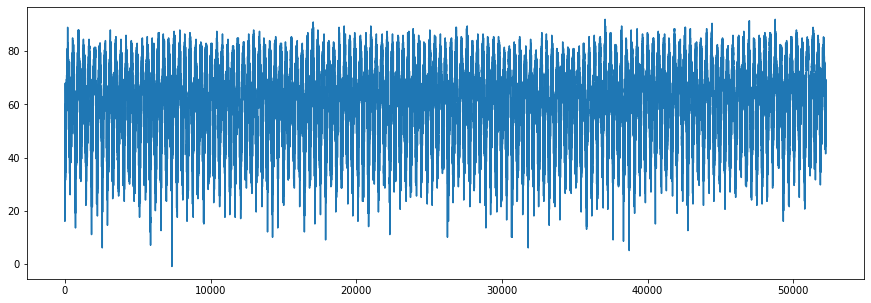

In [8]:
plt.figure(figsize = (15,5))
df_mean['tmean'].plot()

/home/alexandr/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


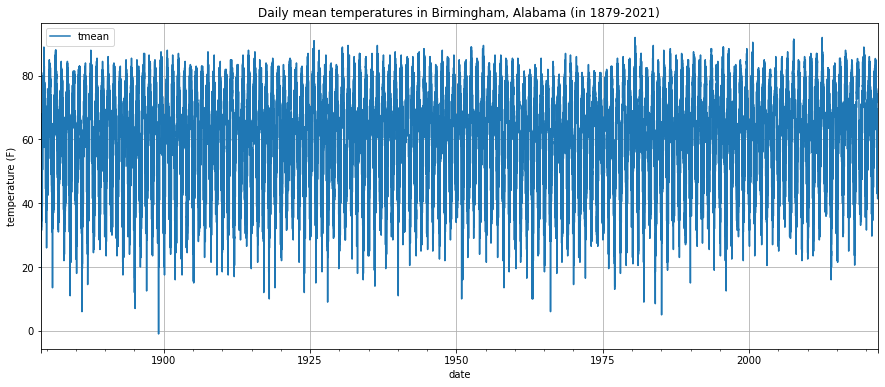

In [11]:
df1 = df_mean
df1['date'] = pd.to_datetime(df1['Date'])
df1.index = df1['date']
del df1['date']

df1.plot(figsize=(15,6))
plt.grid(visible=True)
plt.ylabel("temperature (F)")
plt.title("Daily mean temperatures in Birmingham, Alabama (in 1879-2021)")
plt.show()

/home/alexandr/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


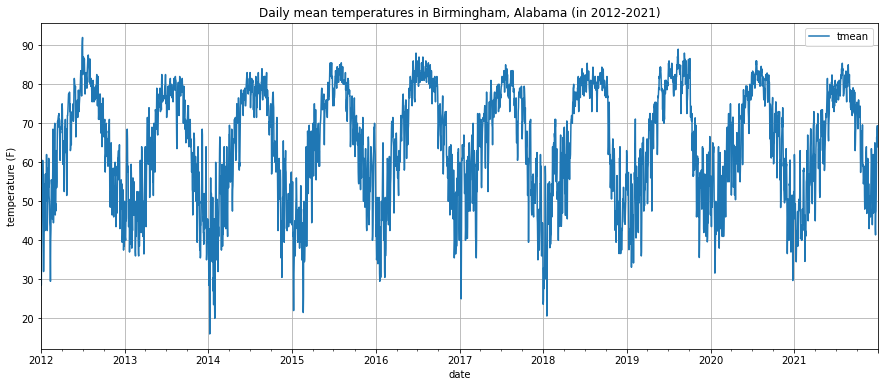

In [16]:
#df1 = df_mean
df2 = df1[df1['Date'] >= '2012']
df2['date'] = pd.to_datetime(df2['Date'])
df2.index = df2['date']
del df2['date']

df2.plot(figsize=(15,6))
plt.grid(visible=True)
plt.ylabel("temperature (F)")
plt.title("Daily mean temperatures in Birmingham, Alabama (in 2012-2021)")
plt.show()

/home/alexandr/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


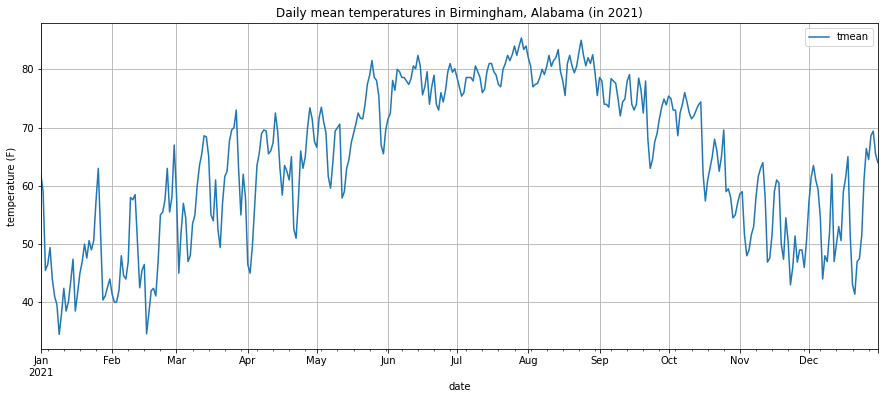

In [17]:
df3 = df1[df1['Date'] >= '2021']
df3['date'] = pd.to_datetime(df3['Date'])
df3.index = df3['date']
del df3['date']

df3.plot(figsize=(15,6))
plt.grid(visible=True)
plt.ylabel("temperature (F)")
plt.title("Daily mean temperatures in Birmingham, Alabama (in 2021)")
plt.show()

<h1>CNN + LSTM</h1>

In [34]:
def plot_series(time, series, format="-", start=0, end=None):
    plt.plot(time[start:end], series[start:end], format)
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.grid(True)

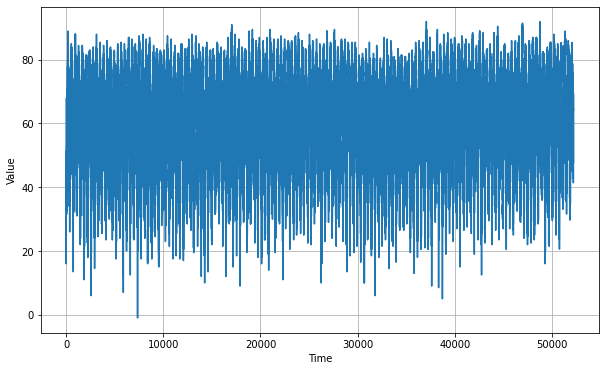

In [44]:
import csv
time_step = []
temps = []

with open('Birmingham-mean.csv') as csvfile:    
  reader = csv.reader(csvfile, delimiter=',')
  next(reader)
  step=0
  for row in reader:
    temps.append(float(row[1]))
    time_step.append(step)
    step = step + 1

series = np.array(temps)
time = np.array(time_step)
plt.figure(figsize=(10, 6))
plot_series(time, series)

In [45]:
split_time = 40000
time_train = time[:split_time]
x_train = series[:split_time]
time_valid = time[split_time:]
x_valid = series[split_time:]

In [46]:
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
    series = tf.expand_dims(series, axis=-1)
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size + 1, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size + 1))
    ds = ds.shuffle(shuffle_buffer)
    ds = ds.map(lambda w: (w[:-1], w[1:]))
    return ds.batch(batch_size).prefetch(1)

In [47]:
def model_forecast(model, series, window_size):
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size))
    ds = ds.batch(32).prefetch(1)
    forecast = model.predict(ds)
    return forecast

In [49]:
window_size = 64
batch_size = 256
shuffle_buffer_size = 1000
train_set = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)
print(train_set)
print(x_train.shape)

model = tf.keras.models.Sequential([
  tf.keras.layers.Conv1D(filters=32, kernel_size=5,
                      strides=1, padding="causal",
                      activation="relu",
                      input_shape=[None, 1]),
  tf.keras.layers.LSTM(64, return_sequences=True),
  tf.keras.layers.LSTM(64, return_sequences=True),
  tf.keras.layers.Dense(30, activation="relu"),
  tf.keras.layers.Dense(10, activation="relu"),
  tf.keras.layers.Dense(1)
])

model.compile(loss='mean_squared_error', optimizer='adam', metrics=["mae"])
history = model.fit(train_set, epochs=100, verbose=1)

<PrefetchDataset shapes: ((None, None, 1), (None, None, 1)), types: (tf.float64, tf.float64)>
(40000,)
Epoch 1/100
156/156 [==============================] - 20s 107ms/step - loss: 1508.4319 - mae: 31.9678
Epoch 2/100
156/156 [==============================] - 17s 108ms/step - loss: 219.5221 - mae: 12.5848
Epoch 3/100
156/156 [==============================] - 19s 120ms/step - loss: 32.8102 - mae: 4.3068
Epoch 4/100
156/156 [==============================] - 19s 124ms/step - loss: 25.8265 - mae: 3.7720
Epoch 5/100
156/156 [==============================] - 19s 120ms/step - loss: 25.1417 - mae: 3.7241
Epoch 6/100
156/156 [==============================] - 20s 126ms/step - loss: 24.8073 - mae: 3.7041
Epoch 7/100
156/156 [==============================] - 20s 125ms/step - loss: 24.5673 - mae: 3.6907
Epoch 8/100
156/156 [==============================] - 19s 123ms/step - loss: 24.3695 - mae: 3.6774
Epoch 9/100
156/156 [==============================] - 20s 126ms/step - loss: 24.2724 - mae:

In [51]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, None, 32)          192       
_________________________________________________________________
lstm_2 (LSTM)                (None, None, 64)          24832     
_________________________________________________________________
lstm_3 (LSTM)                (None, None, 64)          33024     
_________________________________________________________________
dense_3 (Dense)              (None, None, 30)          1950      
_________________________________________________________________
dense_4 (Dense)              (None, None, 10)          310       
_________________________________________________________________
dense_5 (Dense)              (None, None, 1)           11        
Total params: 60,319
Trainable params: 60,319
Non-trainable params: 0
__________________________________________________

In [53]:
forecast = model_forecast(model, series[..., np.newaxis], window_size)
forecast = forecast[split_time - window_size:-1, -1, 0]

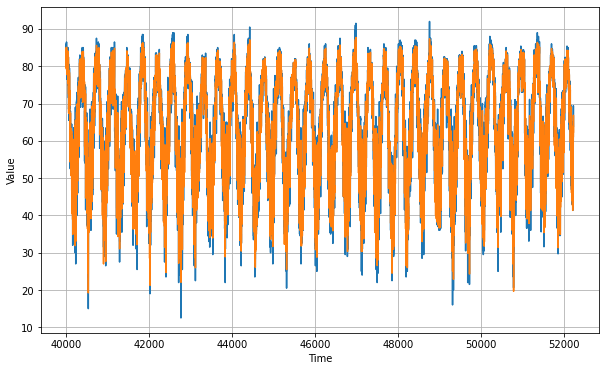

In [54]:
plt.figure(figsize=(10, 6))
plot_series(time_valid, x_valid)
plot_series(time_valid, forecast)

In [55]:
tf.keras.metrics.mean_absolute_error(x_valid, forecast).numpy()

3.2931962

In [56]:
model.save('CNN_LSTM_model.h5')

In [57]:
model = tf.keras.models.load_model('CNN_LSTM_model.h5')